In [2]:
!pip install gradio mediapipe opencv-python matplotlib

In [3]:
import cv2
import mediapipe as mp
import numpy as np

In [4]:
mp_selfie = mp.solutions.selfie_segmentation

In [5]:
cap = cv2.VideoCapture(0)
# Create with statement for model 
with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Apply segmentation
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True

        cv2.imshow('Selfie Seg', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


KeyboardInterrupt: 

In [6]:
res.segmentation_mask

array([[2.0465840e-21, 2.0465840e-21, 2.0465840e-21, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.9593163e-18, 4.9593163e-18, 4.9593163e-18, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.7836859e-17, 5.7836859e-17, 5.7836859e-17, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.8022351e-18, 4.8022351e-18, 4.8022351e-18, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5961650e-18, 7.5961650e-18, 7.5961650e-18, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.8581596e-18, 7.8581596e-18, 7.8581596e-18, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [7]:
from matplotlib import pyplot as plt
from matplotlib import gridspec

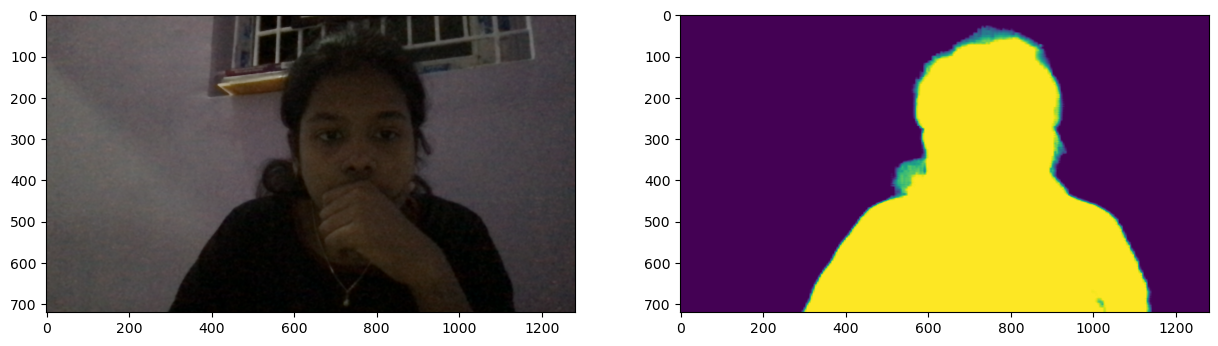

In [8]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

In [9]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 

In [10]:
np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [11]:
segmented_image = np.where(mask, frame, background)

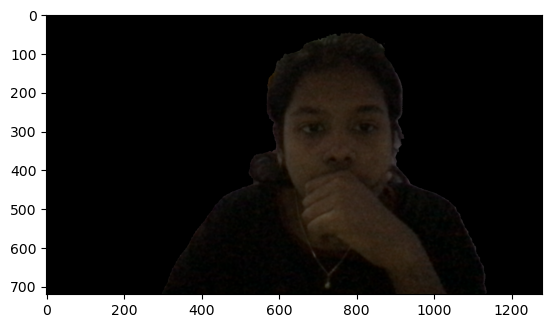

In [12]:
plt.imshow(segmented_image)

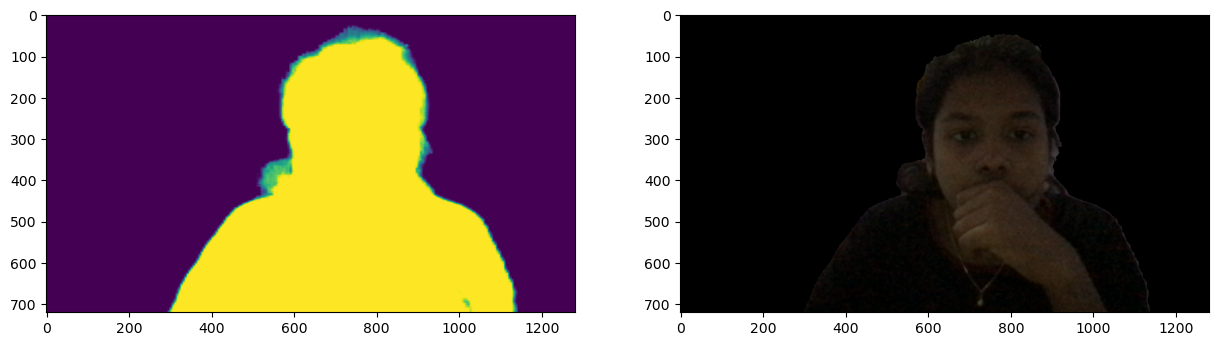

In [13]:
# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [14]:
import gradio as gr

In [15]:
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        return np.where(mask, image, cv2.blur(image, (40,40)))

In [16]:
webcam = gr.inputs.Image(shape=(640, 480), source="webcam")

/var/folders/6t/7m_2rflj0tz07fdcjfrmt8qr0000gn/T/ipykernel_2544/3547363991.py:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  webcam = gr.inputs.Image(shape=(640, 480), source="webcam")
/var/folders/6t/7m_2rflj0tz07fdcjfrmt8qr0000gn/T/ipykernel_2544/3547363991.py:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  webcam = gr.inputs.Image(shape=(640, 480), source="webcam")


In [17]:
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

In [18]:
webapp.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/swetha/anaconda3/lib/python3.11/site-packages/gradio/routes.py", line 442, in run_predict
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/swetha/anaconda3/lib/python3.11/site-packages/gradio/blocks.py", line 1392, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/swetha/anaconda3/lib/python3.11/site-packages/gradio/blocks.py", line 1097, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/swetha/anaconda3/lib/python3.11/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/swetha/anaconda3/lib/python3.11/site-packages/anyio/_backends/